In [1]:
import os
import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', -1) 

RANDOM_SEED = 49
random.seed(RANDOM_SEED) 

# Load pickle files

In [2]:
PICKLE_DIR = 'pickle'

allocine_df = pd.DataFrame()

#TODO: add series ?
# -> 150001 and on !
for filename in os.listdir(PICKLE_DIR):
    if filename.endswith(".pickle"):        
        path = os.path.join(PICKLE_DIR, filename)
        print("Reading file: " + path)
        df = pd.read_pickle(path)
        allocine_df = allocine_df.append(df, ignore_index=True)

print()
print("Loaded {} reviews !".format(len(allocine_df)))

Reading file: pickle/allocine_0.pickle

Loaded 19782 reviews !


# Explore data

In [3]:
allocine_df.sample(5, random_state=RANDOM_SEED)

,film-url,rating,review,date,helpful,unhelpful
13442,http://www.allocine.fr/film/fichefilm-141110/critiques/spectateurs,0.5,Le pire film du MCU. Captain Marvel n’a rien d’original. Il n’y a aucun suspens et aucun enjeu. Ce film est une véritable daube qui n’amène rien de nouveau à l’univers Marvel. Ne vous infligez pas ce film avant Endgame.,2019-03-10,0,0
1289,http://www.allocine.fr/film/fichefilm-270440/critiques/spectateurs,4.5,"Encore une fois, ce réalisateur nous offre un excellent film. Parfaitement exécuté, vous n'avez qu'une chose à faire : le regarder !",2020-01-14,2,0
7197,http://www.allocine.fr/film/fichefilm-266409/critiques/spectateurs,4.0,"Très bon film sur le milieu scolaire, avec beaucoup d'humour et de l'émotion. Juste dommage que la fin ne soit pas crédible, mais à voir assurément.",2019-09-04,0,2
19197,http://www.allocine.fr/film/fichefilm-5434/critiques/spectateurs,3.5,"Les décors sont exceptionnels, ainsi que les costumes/maquillages et la musique. Les acteurs sont bons, l'ambiance sombre et angoissante. Mais je trouve que ce film fait trop ""clip-vidéo"". Certains passages sont de trop, d'autres trop lents. Dommage, car c'est une réalisation très esthétique.",2012-08-18,0,0
5581,http://www.allocine.fr/film/fichefilm-146552/critiques/spectateurs,0.5,"Je viens de voir la fin de la saga Terminator, ce navet qui a pour seul but que de faire du fric vient de la mette à mort. Les actrices ne tiennent pas la route, on dirait des princesses sortis d'un Disney, le Terminator n'est pas crédible et alors ne parlons pas du vieux Schwarzenegger bedonnant. Seule Linda Hamilton tire son épingle du jeu. Le scénario n'a aucun sens et n'a pas beaucoup de rapport avec le 2. Franchement je suis très déçu",2019-10-26,11,6


In [9]:
allocine_df.head(2)

,film-url,rating,review,date,helpful,unhelpful
0,http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs,4.5,"Enfin un polar à l’écran, c'est tellement rare de nos jours. Le film dispose d'une photographie, de plans, travelling vraiment léché, très bon travail. L'humour bien présent est excellent avec des répliques qui font mouche surtout dans la première moitié du film, la seconde étant plus sérieuse d'une manière générale. Scénario efficace, Edward Norton joue superbement bien comme toujours. Des morceaux de jazz percutant, un excellent film.",2019-12-06,1,0
1,http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs,3.5,"Inspiré du roman Motherless Brooklyn, écrit par Jonathan Lethem et sortie en octobre 1999, Edward Norton réalise un vrai polar à l'ancienne, avec ses atouts et ses faiblesses. Contrairement au livre, l'intrigue se déroule dans les années 50 et pas en 1999. Tant mieux, l'ambiance des années 50 est vraiment envoûtante, les bagnoles sont magnifiques, les costumes toujours élégants, visuellement c'est une période tellement intéressante. Edward Norton s'offre un rôle assez particulier à travers ce détective atteint du syndrome de Gilles de la Tourette. Sa prestation est d'ailleurs assez bluffante, pour avoir su rentre ce trouble crédible tout en gardant son sérieux ! Le reste du casting n'est pas en reste, avec notamment Bruce Willis, Alec Baldwin ou Willems Dafoe qui offre leurs charismes à des personnages forts. Niveau Scenario, l'enquête arrive facilement à nous captiver, même si elle piétine un moment, imposant quelques baisses de rythme. J'avoue qu'il manque peut-être aussi quelques affrontements plus musclés, un interrogatoire intense ou quelques choses dans le genre pour vraiment parfaire l'ensemble. Ces petits bémols ne gâchent cependant pas les révélations finales qui clôturent le film avec panache. Bref, on est face à un vrai polar, très bien interprété, visuellement séduisant, manquant juste un peu de poigne.",2019-12-12,0,0


Pickle files are not loaded in order.
We sort the dataframe by film id for convenience

In [6]:
# Pickle files are not loaded in order
# We sort the dataframe by film id
# TODO => don't do that. Sort path at the loading part so we don't have to do this
#allocine_df = allocine_df.sort_values("film-url")
#allocine_df = allocine_df.reset_index(drop=True)

In [8]:
#allocine_df.head(2)

## Negative reviews

We consider a review is negative when its associating rating is less than or equal to 2.0, which includes 4 categories: 0.5, 1.0, 1.5 and 2.0

In [10]:
negative_reviews = allocine_df[allocine_df['rating'] <= 2.0]
negative_reviews.sample(3, random_state=RANDOM_SEED)

,film-url,rating,review,date,helpful,unhelpful
14081,http://www.allocine.fr/film/fichefilm-265573/critiques/spectateurs,0.5,"Rien à sauver dans ce film si ce n est les paysages. Le reste est affligeant, acteurs non motivés, grosses ficelles réchauffées, j ai attendu le générique de fin avec impatience...",2020-01-10,1,0
1982,http://www.allocine.fr/film/fichefilm-215094/critiques/spectateurs,0.5,Ce n'est pas du Star Wars. Les producteurs n'ont rien compris à l'univers et ça se ressent. Il a été tourné juste pour vendre des jouets et autres...,2019-12-27,1,2
8236,http://www.allocine.fr/film/fichefilm-257482/critiques/spectateurs,0.5,Franchement grand fan de l acting de Leonardo et Brad mais si il avais pris des acteurs lambda le film est inregardable autant Tarantino a toujours une façon d écrire qui est décalé qu on sait apprécier mais la l histoire est nulle le film est lent bref un navet qui en plus s avére être un somnifère j aurais pu m endormir heureusement que la fin est un peu animée ...,2019-09-05,1,7


## Positive reviews

We consider a review is positive when its associating rating is greater than or equal to to 4.0, which includes 3 categories: 4.0, 4.5 and 5.0

In [11]:
positive_reviews = allocine_df[allocine_df['rating'] >= 4.0]
positive_reviews.sample(3, random_state=RANDOM_SEED)

,film-url,rating,review,date,helpful,unhelpful
19170,http://www.allocine.fr/film/fichefilm-55983/critiques/spectateurs,4.0,"Ce remake n'est peut-être pas innovant, en tous cas il est prenant. L'accumulation de morts par balles peut lasser mais la mise en scène ne les rend pas insupportables. Les acteurs jouent justes, surtout Nicholson et DiCaprio, qui sont étonnants de ressemblance malgré leurs 37 ans de différence.",2007-04-25,0,0
12388,http://www.allocine.fr/film/fichefilm-262124/critiques/spectateurs,4.0,"J'ai tellement rigoler c'est très divertissant, le casting est excellent. C'est mon avis et je m'en fiche des avis dès autres.",2019-12-04,0,2
10940,http://www.allocine.fr/film/fichefilm-258374/critiques/spectateurs,5.0,"C'était ambitieux de passer derrière Heath Ledger dans le role du Joker, mais l'interpretation livrée par Joaquin Phoenix est magistrale.\nUne plongée dans la folie et l'esprit malade de celui qui va devenir le Joker a force de subir les coups durs de la vie.",2019-10-20,0,0


# TODO

In [12]:
sns.set(style="whitegrid")

## Rating counts

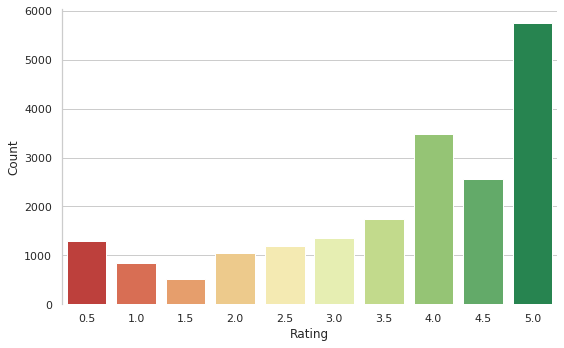

In [17]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=10)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)
ax.set(xlabel='Rating', ylabel='Count')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/rating_counts.png', dpi=200)

## Polarity

In [18]:
def find_polarity(row):
    if row['rating'] <= 2.0:
        return -1
    elif row['rating'] >= 4.0:
        return 1
    else:
        return 0

allocine_df['polarity'] = allocine_df.apply(lambda row : find_polarity(row), axis=1) 

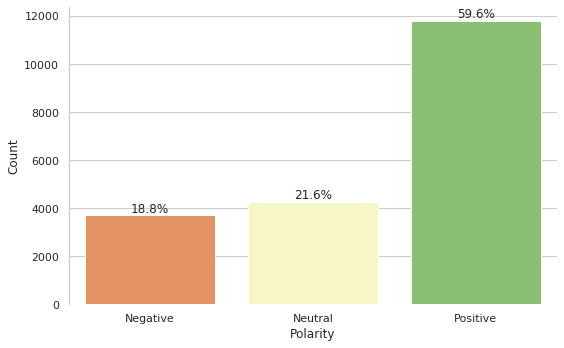

In [19]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
ax.set(xlabel='Polarity', ylabel='Count')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(allocine_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/polarity_frequency.png', dpi=200)

## Reviews per year

In [20]:
allocine_df['date'] = pd.to_datetime(allocine_df['date'])
reviews_per_year = allocine_df.groupby(allocine_df['date'].dt.year).size()

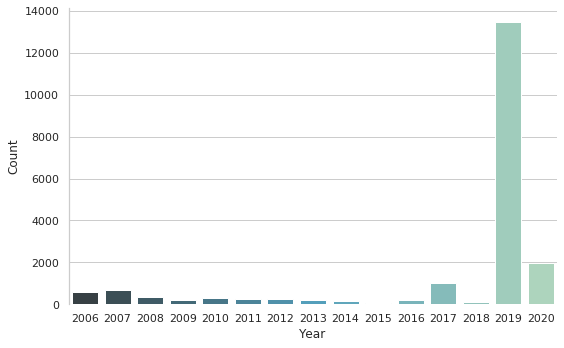

In [22]:
plt.figure(figsize=(8,5))
ax = sns.barplot(reviews_per_year.index, reviews_per_year.values, palette="GnBu_d")
ax.set(xlabel='Year', ylabel='Count')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_per_year.png', dpi=200)

## Reviews length

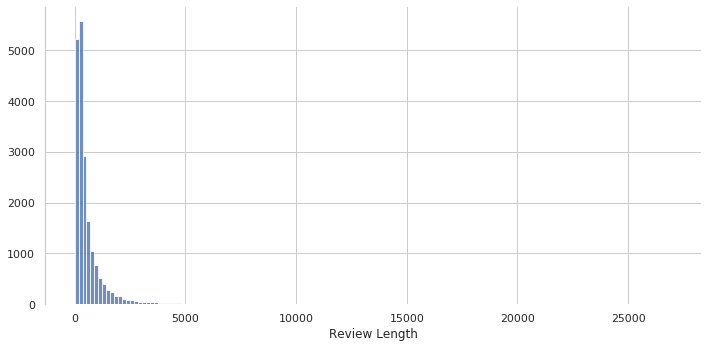

In [23]:
reviews_length = allocine_df['review'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_length.png', dpi=200)

In [24]:
THRESHOLD = 4000
short_reviews = allocine_df[allocine_df['review'].str.len() <= THRESHOLD]
long_reviews =  allocine_df[allocine_df['review'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(allocine_df)
))

254 reviews with LEN > 4000 (1.28 % of total data)


Example of a long review

In [25]:
long_reviews.head(1)

film-url  \
12  http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs   

    rating  \
12  3.5      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

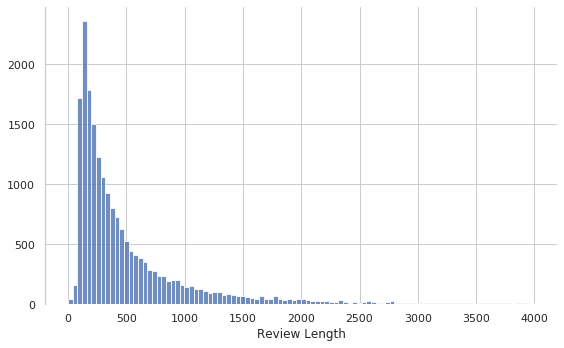

In [26]:
short_reviews_length = short_reviews['review'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/short_reviews_length.png', dpi=200)

In [ ]:
# TODO: other analysis ?
# Histograms of reviews lengths for each rating (negative reviews are shorter ?)

In [ ]:
# Num reviews per film ? => why are we limiting to 30 reviews per film ?

# Build dataset

In [32]:
dataset_df = allocine_df.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 19782


## Remove data we don't need 

In [33]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [34]:
# 1. Drop columns we don't need
dataset_df = dataset_df.drop(columns=['rating', 'date', 'helpful', 'unhelpful'])

# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['polarity'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 3. Remove long reviews
LENGTH_THRESH = 4000
dataset_df = dataset_df[dataset_df['review'].str.len() <= LENGTH_THRESH]
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 4. Limit number of reviews per film
MAX_REVIEWS_PER_FILM = 30
grouped = dataset_df.groupby('film-url')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_FILM:
        sampling_size = num_reviews - MAX_REVIEWS_PER_FILM
        ids_to_drop = random.sample(list(ids), sampling_size)
        dataset_df = dataset_df.drop(ids_to_drop)
        
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# Total loss
length, percentage = loss_percentage(dataset_df, initial_len)
print("Total loss: (-{:.1f} %)".format(percentage))

Length: 15508 (-21.6 %)
Length: 15333 (-1.1 %)
Length: 1214 (-92.1 %)
Total loss: (-93.9 %)


In [35]:
dataset_df.groupby('polarity').size()

polarity
-1    320
 1    894
dtype: int64

## Clean review text

In [36]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['review'] = dataset_df['review'].apply(clean_text)

In [37]:
dataset_df.sample(5, random_state=RANDOM_SEED)

,film-url,review,polarity
6195,http://www.allocine.fr/film/fichefilm-255238/critiques/spectateurs,"Film très spécial et pourtant, l'univers du film, la dureté du film, enfin tout est captivant et pourtant je suis pas fan de ce type de film d'auteur... comme quoi tout est possible. A voir sans hesiter",1
12194,http://www.allocine.fr/film/fichefilm-262099/critiques/spectateurs,"Présenté en compétition au Festival de Cannes 2019, « Le Lac aux Oies Sauvages » nous plonge en Chine dans la cavale d’un gangster ennemi de tous. Dans une ambiance nocturne et pluvieuse, il tombera amoureux d’une baigneuse, c’est-à-dire une prostituée qui souhaite s’échapper de son malheureux sort. Le film est très violent et le travail sur les sons et les plans sont étonnants. Mais le film est également très romantique et la photographie valorise la femme avec un style presque céleste. « Le Lac aux Oies Sauvages » est un polar envoûtant grâce à une mise en scène et un esthétisme irréprochable et ce, malgré la complexité de l’intrigue. D'autres critiques sur notre page Facebook : Cinéphiles 44 et notre site cinephiles44.com",1
12911,http://www.allocine.fr/film/fichefilm-262485/critiques/spectateurs,"Chanceux ceux qui n'ont pas encore cette merveille ! Les images sont splendides et donnent sens à cette question essentielle : quelle place sommes nous prêts à laisser au sauvage pour assurer notre équilibre ? avec respect et intelligence. Simple, pur, profond ce film de jean Michel BERTRAND nous ouvre les yeux sur la magie de notre monde.",1
12622,http://www.allocine.fr/film/fichefilm-262396/critiques/spectateurs,"Très bon biopic, rythmé, prenant, et les 2:30 passent vite. Bien que je n'aime pas les courses de Nascar, les scènes de courses automobiles sont bien tournées et on rentre dans l'action. On voit dans le film un Henri Ford (le second) pas commode du tout et limite imbuvable mais changeant d'un seul coup dans la scène où il s'effondre dans la GT40: excellent. Du bon ciné musclé dans une ambiance bien recréée des années 1960.",1
15602,http://www.allocine.fr/film/fichefilm-270440/critiques/spectateurs,"Je conseil a tout le monde d'aller le voir!!! Personnage attachant bien que certains pas assez détaillés , histoire bien amené sur le climat sans trop en faire , pm= petit message pour Libération critique non constructive c'est dégueulasse de mettre une étoile Même si vous aimez pas . Aller voir leur critique",1


## Balance classes

In [43]:
# The overall distribution of labels is balanced (25k pos and 25k neg).
# We don't have to have train and testset perfectly balanced

balanced_df = dataset_df.copy()

MAX_REVIEWS_PER_POLARITY = 300
# 4. Limit number of reviews per film
grouped = balanced_df.groupby('polarity')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_POLARITY:
        sampling_size = num_reviews - MAX_REVIEWS_PER_POLARITY
        ids_to_drop = random.sample(list(ids), sampling_size)
        balanced_df = balanced_df.drop(ids_to_drop)

In [45]:
print(balanced_df.groupby('polarity').size())
balanced_df.sample(10, random_state=RANDOM_SEED)

polarity
-1    300
 1    300
dtype: int64


,film-url,review,polarity
12317,http://www.allocine.fr/film/fichefilm-262124/critiques/spectateurs,Magnifique encore mieux que le precedent et toujour le meme humour une belle réussite encore je me suis bien amusée !!!,1
12959,http://www.allocine.fr/film/fichefilm-263312/critiques/spectateurs,"Voici un polar roumain bien tordu, entre Roumanie, la Gomera aux Canaries et pour le final Singapour. Un flic piégé par la pègre, une femme ultra fatale, une procureure psychorigide, une intrigue complètement azimutée, un langage sifflé en trois langues, ajoutez en plus trois phases temporelles bien mélangées et chapitré par personnage, et vous obtenez une recette de polar absolument unique.",1
13575,http://www.allocine.fr/film/fichefilm-264228/critiques/spectateurs,"Très bon film je recommande, moment agréable à passer seul ou à plusieurs, histoire immersive, touchante. Beaucoup à dire. Mais encore !",1
14386,http://www.allocine.fr/film/fichefilm-266409/critiques/spectateurs,"Ah la bien pensance en une scéance ... Quand c'est bien traité, avec humour, positivisme, sous un fond de psychologie ""vraie"" pourquoi pas mais là le sujet est survolé. Pas vraiment du cinéma",-1
14382,http://www.allocine.fr/film/fichefilm-266409/critiques/spectateurs,"Je ne recommande à personne d’aller voir ce film. Un ramassis de clichés sur les jeunes de cités. Pendant toute la durée du film on voit Amel, Yanis, Farid... faire des bêtises et être en échec scolaire. C’est une honte qu’en 2019, au cinéma, on se permette de montrer encore cette image des jeunes de cités, comme étant des débiles incapables de s’en sortir. Je suis d’autant plus déçue que Grand Corps Malade ait participé à la réalisation de ce film. Parlons aussi de la « morale » de ce film, et de la représentation des classes segpa. Alors d’apres ce film ces classes sont pour les « débiles » et les fauteurs de troubles. Pourtant ces classes permettent réellement à certains enfants de rattraper leur retard et de poursuivre les études de leurs choix à leurs rythmes, et adaptées à leurs profils. Parce que non en segpa on ne fait pas du repassage et de la couture et qu’on peut vivre en cité,banlieue, tout en étant cultivé et en ayant soif d’apprendre.",-1
15193,http://www.allocine.fr/film/fichefilm-267581/critiques/spectateurs,"Le réalisateur Maxime Giroux retrouve son alter-ego Martin Dubreuil pour une conquête de l'ouest atemporelle et envoûtante : paysages grandioses et cadres resserrés en clair-obscur, galerie de personnages inquiétants et fascinants (Romain Duris, Reda Kateb, Soko, Sarah Gadon...), habile mélange des genres... Tout est réuni pour faire vivre au spectateur une expérience intellectuelle et sensorielle dont il se souviendra longtemps.",1
2784,http://www.allocine.fr/film/fichefilm-215094/critiques/spectateurs,"Une déplorable pauvreté linguistique, des décors sans intérêt, l’antre depapi palpatine et déjà vue mille fois et jamais appréciée, une grotte, des pics et un fauteuil roulant télescopique, ça n’a rien de captivant. Pour ce qui est des « dialogues », étant lycéen, j’aurais pu poser mon bon micro à n’importe quelle table de la cantine pour les créer, rendant ce filme encore plus déprimant. Des incohérences à foison : d’où sort le margoulin dans le faucon millenium au début du filme ? Il dit un mot puis disparaît jusqu’à l’une des dernières scènes. La mort du général espion vaut-elle la peine d’être commentée ? Kylo Ren qui prend le collier de Rey par télépathie ? Suivi d’un « attends, j’arrive »? Leur cailloux à la qui les mènent à leur planète ? Je regrette mais pas d’arkenstone dans Star Wars, c’est sensé être un filme de science fiction. Les croiseurs qui sortent de terre ? Les méchants TOUJOURS associés à la pluie, le gris et le noir, même pas un peu de feu, dans une grotte bien sûr sinon ça devient trop dur à comprendre.C’est au jeu d’acteur de Poe Dameron avec ses mimiques que je donne ces 0,5. C’est une honte. On se prend une avalanche d’effets spéciaux et de dialogues PA

In [119]:
# split train / test
# While True
# 1. random in train_set ids => find corresponding row
# 2. add all rows with same film id test_set
# 3. is test_proportion reached ? Yes: STOP, No continue

# => verify this split preserve the balanced distribution of classes